In [243]:
import torch
import torchvision
#for graph visualization
import random
from matplotlib import pyplot as plt
from torch_geometric.utils import to_networkx
import networkx as nx
from dgl.data import *
from torch_geometric.datasets import Planetoid
from utils import *
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
dataset = Planetoid(root = '/tmp/cora', name = 'CORA')
graph = dataset[0]
G = to_networkx(graph,to_undirected=True)

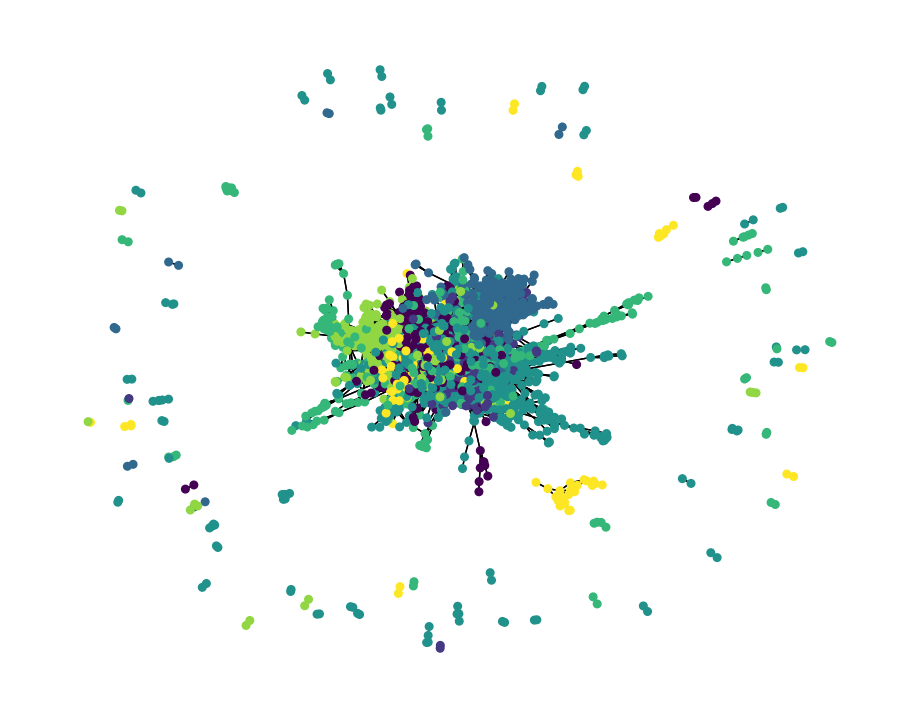

In [3]:
plot_graph(graph)

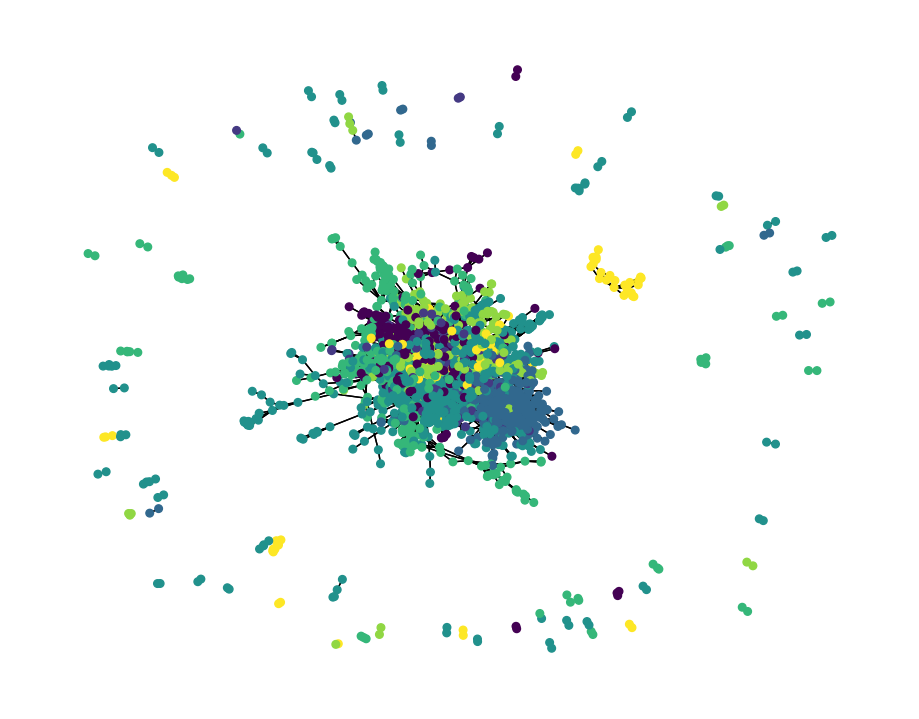

In [9]:
plot_graph(graph)

In [4]:
central_and_cluster(G)

array([[9.76615355e-07, 1.10823790e-03, 9.05766833e-05, ...,
        3.33333333e-01, 0.00000000e+00, 9.09090909e-02],
       [1.08047671e-03, 1.10823790e-03, 9.46457653e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.05081627e-03, 1.84706317e-03, 1.34609896e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.34448161e-03],
       ...,
       [0.00000000e+00, 3.69412634e-04, 7.40293027e-33, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.96352841e-05, 1.47765054e-03, 5.62591416e-05, ...,
        5.00000000e-01, 0.00000000e+00, 3.33333333e-01],
       [1.67759753e-04, 1.47765054e-03, 2.37370599e-04, ...,
        8.33333333e-01, 0.00000000e+00, 7.61904762e-02]])

In [178]:
importance_plot(G,graph,layout='spectral_layout',part=None
               ,k=0.3 ,method='degree',best=0.25,good=0.1)

TypeError: spectral_layout() got an unexpected keyword argument 'seed'

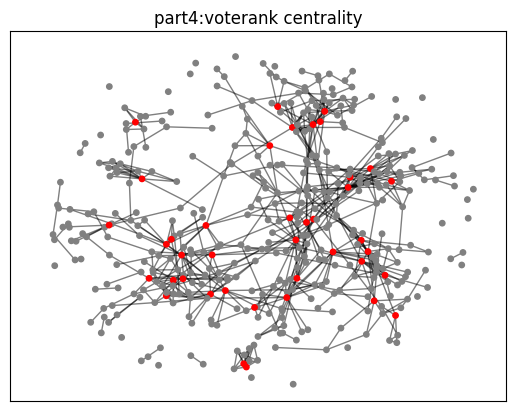

In [212]:
importance_plot(G,graph,part=4
                ,method='voterank',number=40)

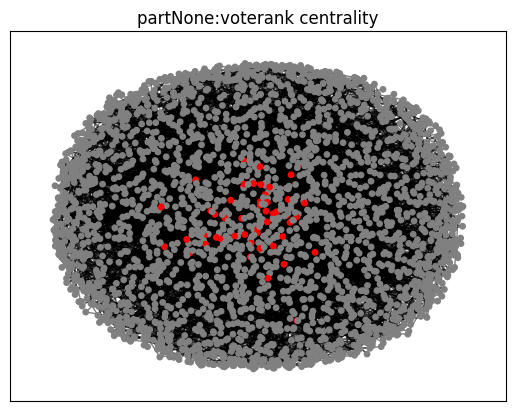

In [207]:
importance_plot(G,graph,part=4
               ,k=0.3 ,method='voterank',best=0.25,good=0.1)

C:\APPs\anaconda\envs\d2l\lib\site-packages\matplotlib\cbook\__init__.py:1026: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


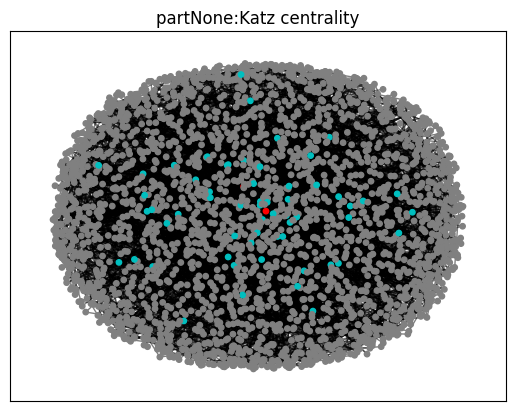

True

In [169]:
importance_plot(G,graph,part=None
               ,k=0.3 ,method='katz',best=0.25,good=0.1)

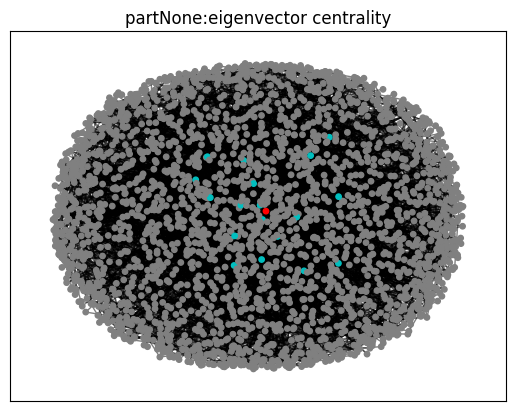

True

In [170]:
importance_plot(G,graph,part=None
               ,k=0.3 ,method='eigen',best=0.25,good=0.1)

True

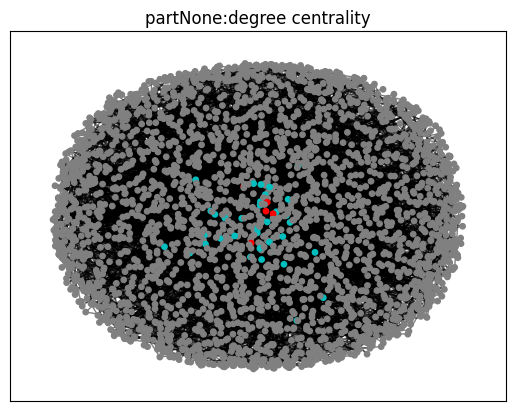

In [171]:
importance_plot(G,graph,part=None
               ,k=0.3 ,method='degree',best=0.25,good=0.1)

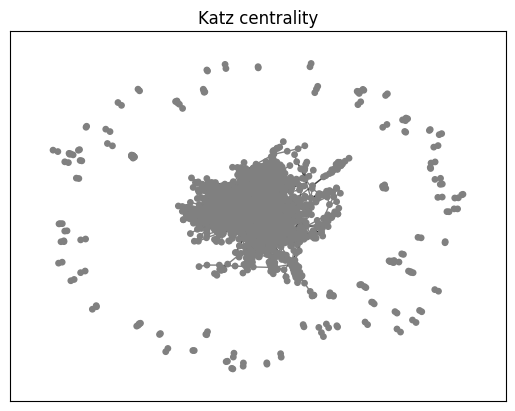

True

In [11]:
importance_plot(G, part=None,method='katz')

In [216]:


if nx.is_connected(G):
    # Average distance
    ave_len = nx.average_shortest_path_length(G)
    print("Average distance:", ave_len)


NetworkXError: Graph is not connected.

In [218]:
components = nx.connected_components(G) 
for i in components:
    Diameter = nx.diameter(i)
    print("Diameter:", Diameter)    

AttributeError: 'set' object has no attribute 'order'

Clustering: 0.24067329850193728


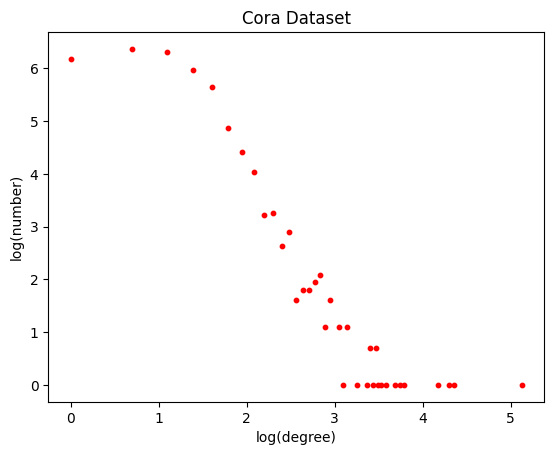

In [213]:
import math

# Degree
# 存储度数相应点数
number = []
# 存储度数
degree = []
for i in nx.degree_histogram(G):
    number.append(i)
for j in range(len(nx.degree_histogram(G))):
    degree.append(j)
# 去掉number=0,并取log
logxy = {}
for i in range(len(degree)):
    if (number[i] != 0):
        logxy[math.log(degree[i])] = math.log(number[i])

# 作图
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title('Cora Dataset')
plt.xlabel("log(degree)")
plt.ylabel("log(number)")
plt.scatter(logxy.keys(), logxy.values(), c="red", s=10)

In [97]:
y = graph.y.numpy()

In [98]:
y

array([3, 4, 4, ..., 3, 3, 3], dtype=int64)

In [192]:
color = []
a=nx.voterank(G,50)
for i in a:
    color.append("r")
    
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("part:pagerank centrality")
    nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()    

NameError: name 'color' is not defined

In [191]:
max_center_value = max(a.values())

AttributeError: 'list' object has no attribute 'values'

In [195]:
degree_dict = nx.degree_centrality(G)

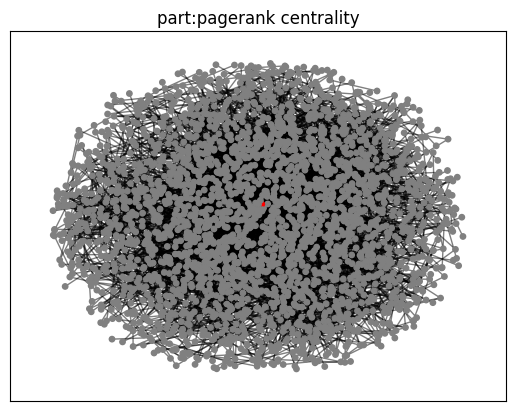

In [200]:
pos = nx.spring_layout(G,k=0.15,seed=100)
color = []
a=nx.voterank(G,1)
for i in degree_dict.keys():
    if i in a:
        color.append("r")
    else:
        color.append([0.5, 0.5, 0.5])
    
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_title("part:pagerank centrality")
nx.draw_networkx_nodes(G, pos, node_size=15, node_color=color)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()    

Average degree: 10.556
Clustering: 0.23763551095541188
Average distance: 6.310998681298742
Diameter: 19
Size: 2485


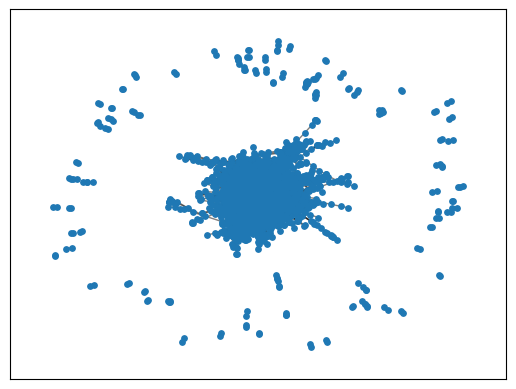

Average degree: 10.556
Clustering: 0.23763551095541188
Average distance: 6.310998681298742
Diameter: 19
Size: 2485


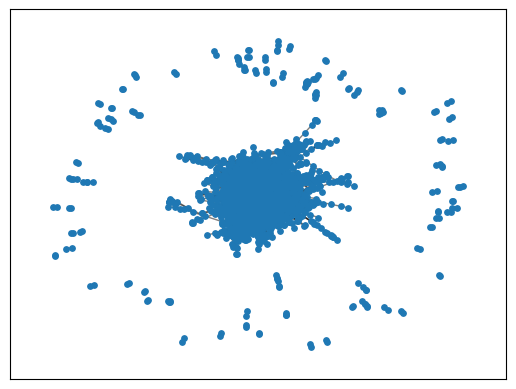

Average degree: 10.556
Clustering: 0.23763551095541188
Average distance: 6.310998681298742
Diameter: 19
Size: 2485


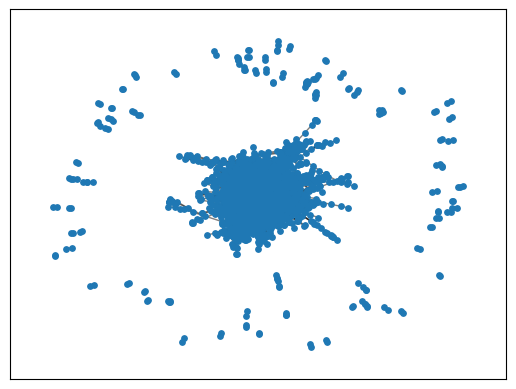

Average degree: 10.556
Clustering: 0.23763551095541188
Average distance: 6.310998681298742
Diameter: 19
Size: 2485


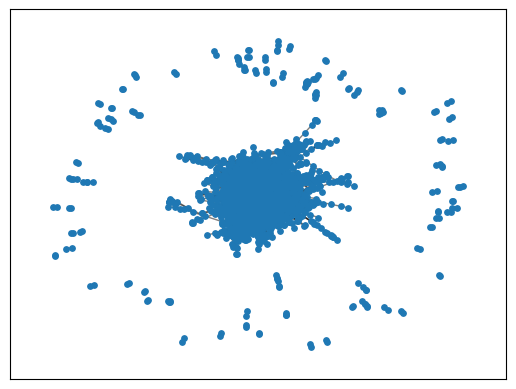

In [217]:
n = 1000
pos = nx.spring_layout(G)

for c in [0.01, 0.1, 1, 10]:

    subG = G.subgraph(max(nx.connected_components(G),key=len))
    
    print("==========================")
    # Average degree
    ave_deg = len(G.edges())*2/n
    print("Average degree:", ave_deg)

    Clus = nx.average_clustering(subG)
    print("Clustering:", Clus)

    # Average distance
    ave_len = nx.average_shortest_path_length(subG)
    print("Average distance:", ave_len)

    # Diameter
    Diameter = nx.diameter(subG)
    print("Diameter:", Diameter)

    # Size
    size = len(subG.nodes())
    print("Size:", size)


    nx.draw_networkx_nodes(G, pos, node_size=15)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


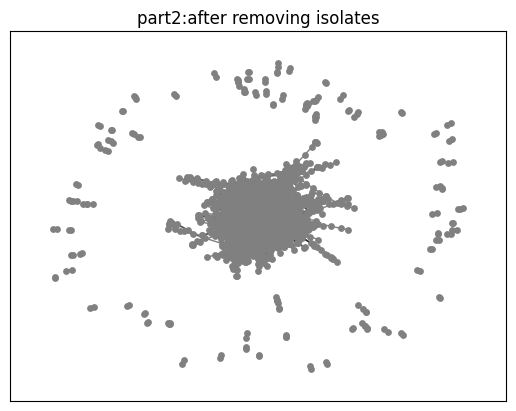

In [219]:
    G1 = G.copy()
    G1.remove_nodes_from(nx.isolates(G1))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("part2:after removing isolates")
    nx.draw_networkx_nodes(G1, pos, node_size=15, node_color=[0.5, 0.5, 0.5])
    nx.draw_networkx_edges(G1, pos, alpha=0.5)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


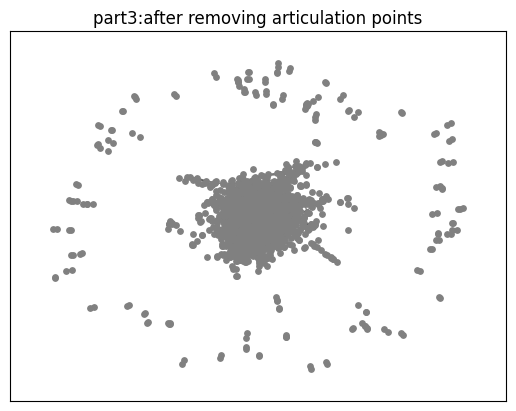

In [220]:
    G2 = G1.copy()
    G2.remove_nodes_from(list(nx.articulation_points(G2)))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("part3:after removing articulation points")
    nx.draw_networkx_nodes(G2, pos, node_size=15, node_color=[0.5, 0.5, 0.5])
    nx.draw_networkx_edges(G2, pos, alpha=0.5)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


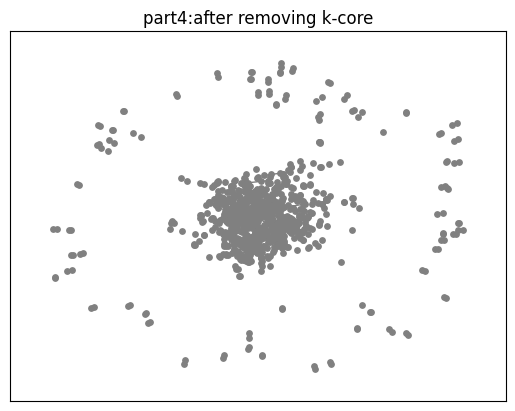

In [221]:
    G3 = G2.copy()
    G3.remove_nodes_from(list(nx.k_core(G3, k=2)))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("part4:after removing k-core")
    nx.draw_networkx_nodes(G3, pos, node_size=15, node_color=[0.5, 0.5, 0.5])
    nx.draw_networkx_edges(G3, pos, alpha=0.5)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


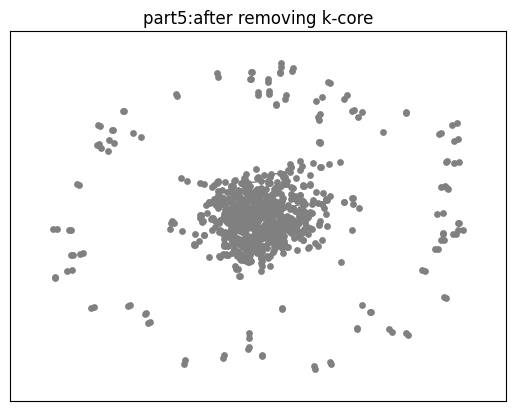

In [224]:
    G4 = G3.copy()
    G4.remove_nodes_from(list(nx.k_core(G4, k=3)))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("part5:after removing k-core")
    nx.draw_networkx_nodes(G4, pos, node_size=15, node_color=[0.5, 0.5, 0.5])
    nx.draw_networkx_edges(G4, pos, alpha=0.5)
    plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


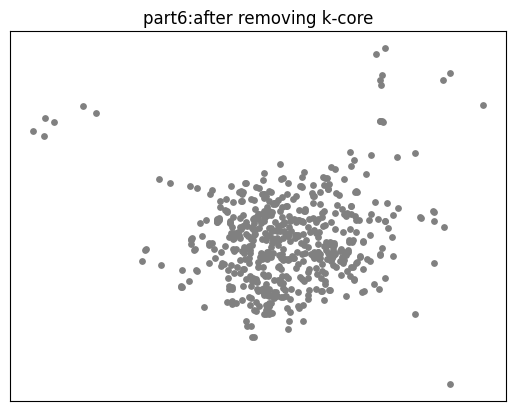

In [227]:
    G5 = G4.copy()
    G5.remove_nodes_from(list(nx.k_core(G5, k=1)))
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_title("part6:after removing k-core")
    nx.draw_networkx_nodes(G5, pos, node_size=15, node_color=[0.5, 0.5, 0.5])
    nx.draw_networkx_edges(G5, pos, alpha=0.5)
    plt.show()

In [232]:
%load_ext autoreload 
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


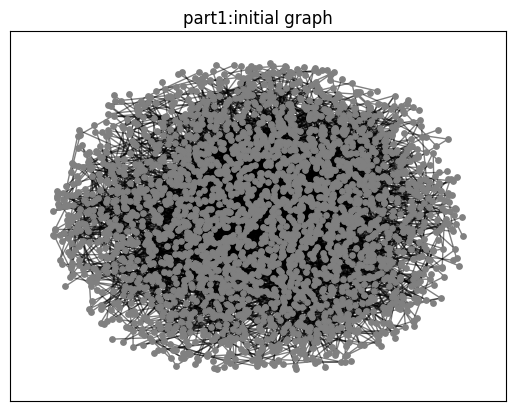

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


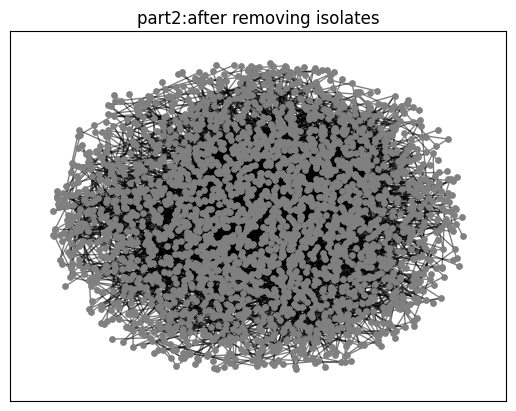

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


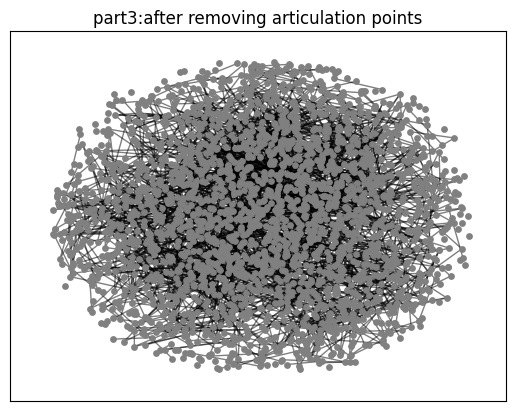

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


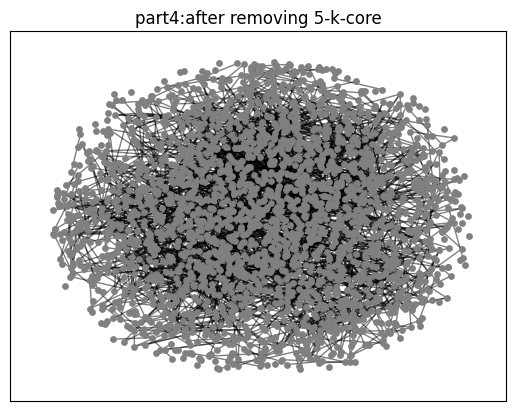

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


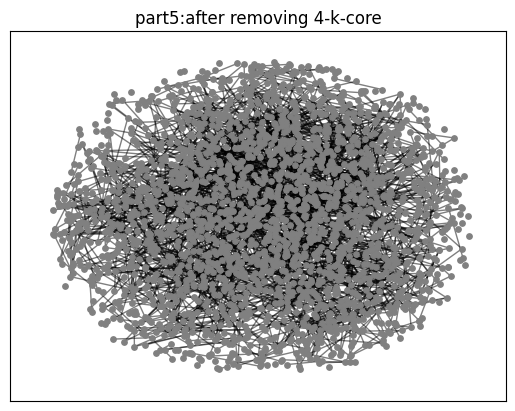

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


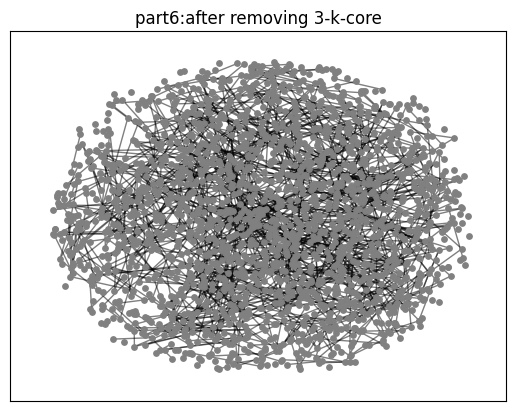

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


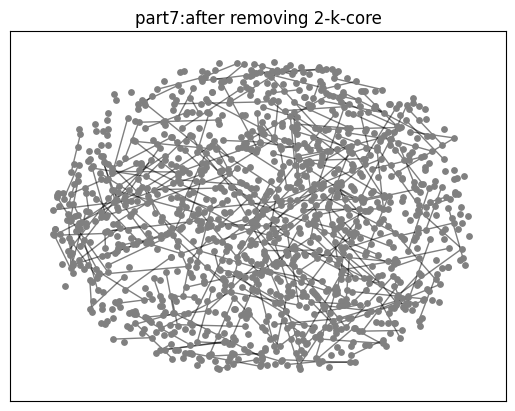

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


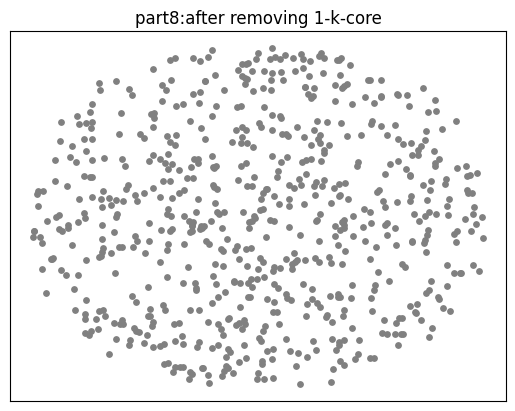

In [238]:
draw_evolution(G,graph, layout='spring_layout', k=0.15)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


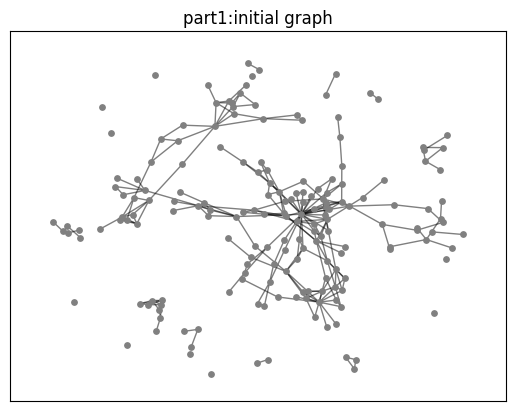

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


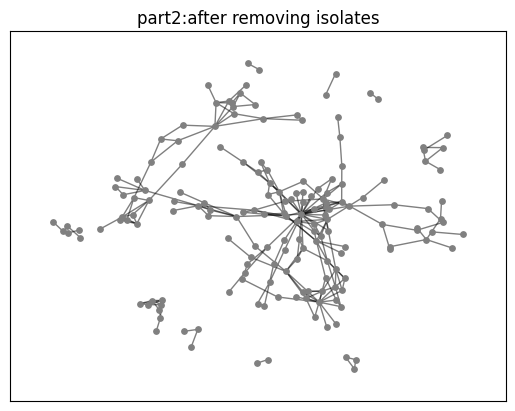

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


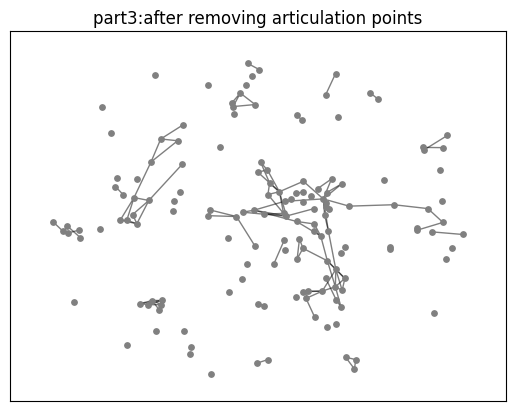

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


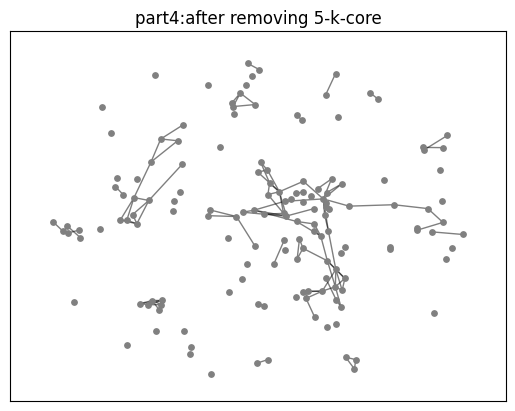

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


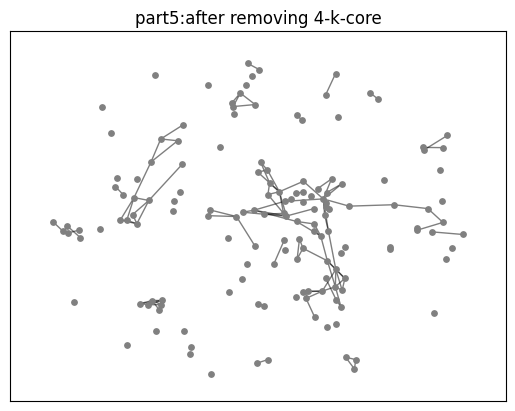

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


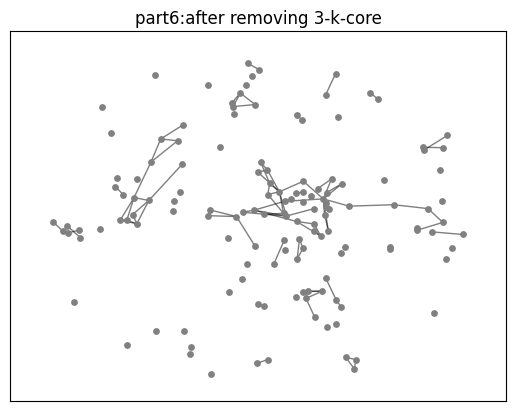

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


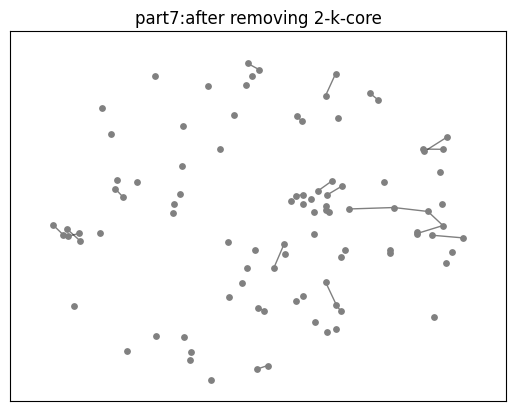

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


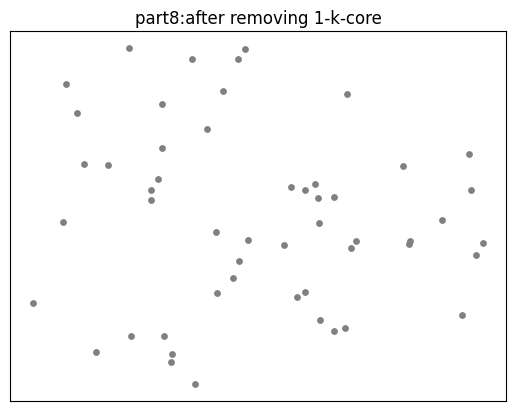

In [240]:
draw_evolution(G,graph, layout='spring_layout',part=6, k=0.15)

In [241]:
central_and_cluster(G).shape

(2708, 8)

In [246]:
draw_graph()

规则图的节点间平均距离为： 2.912937299708235
规则图的平均群聚系数为： 0.006938505791805895
规则图的直径为： 4
规则图的diameter为： 4
ER随机图的节点间平均距离为： 2.7551293517162954
ER随机图的平均群聚系数为： 0.009725152504324609
ER随机图的直径为： 4
ER随机图的diameter为： 4
BA无标度网络的节点间平均距离为： 2.7875566328120267
BA无标度网络的平均群聚系数为： 0.028754563435912886
BA无标度网络的直径为： 4
BA无标度网络的diameter为： 4
WS小世界网络的节点间平均距离为： 5.233245063539519
WS小世界网络的平均群聚系数为： 0.49932121669566265
WS小世界网络的直径为： 8
WS小世界网络的diameter为： 8
星形网络的节点间平均距离为： 1.999261447562777
星形网络的平均群聚系数为： 0.0
星形网络的直径为： 2
星形网络的diameter为： 2
环形网络的节点间平均距离为： 677.2500923531585
环形网络的平均群聚系数为： 0.0
环形网络的直径为： 1354
环形网络的diameter为： 1354
